In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df= pd.read_csv("Titanic.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


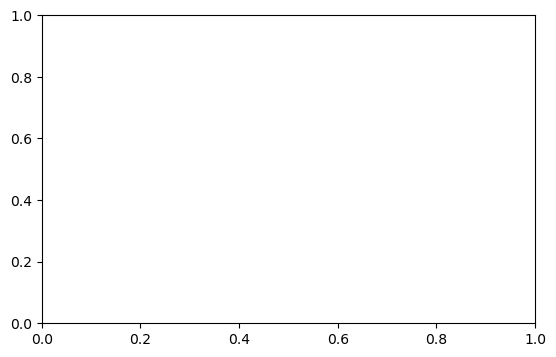

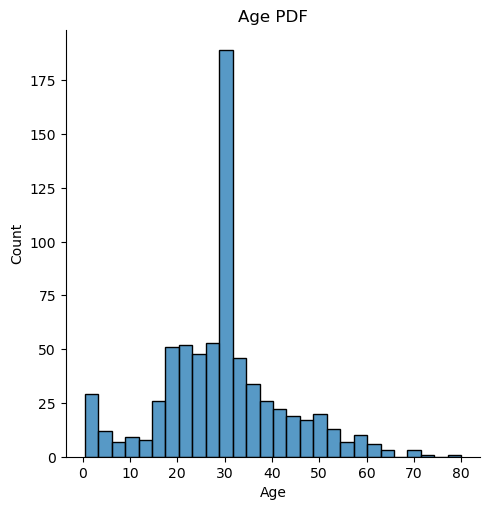

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(X_train['Age'])
plt.title('Age PDF')
plt.show()

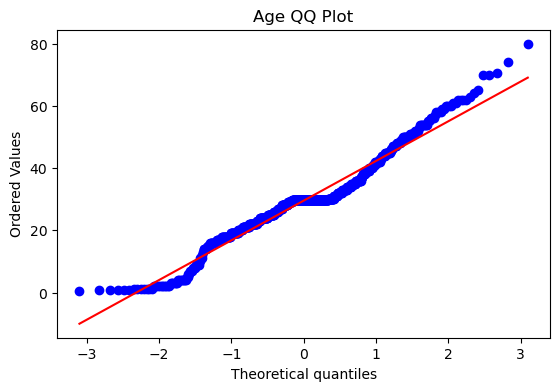

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.show()

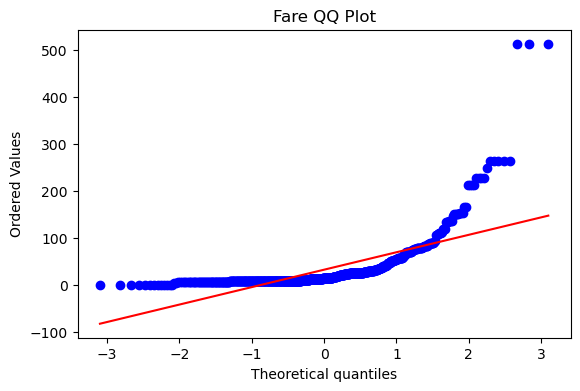

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [12]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [13]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print('Accuracy LR',accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [14]:
trf = FunctionTransformer(func=np.log1p)

In [15]:
x_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred1= clf1.predict(X_test_transformed)
y_pred2= clf2.predict(X_test_transformed)

print("Accuracy Score of LR", accuracy_score(y_test,y_pred1))
print("Accuracy Score of DT", accuracy_score(y_test,y_pred2))

Accuracy Score of LR 0.6815642458100558
Accuracy Score of DT 0.6983240223463687


In [19]:
X_transformed = trf.fit_transform(x)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_transformed,y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring="accuracy",cv=10)))

LR 0.678027465667915
DT 0.6566416978776529


Text(0.5, 1.0, 'Fare after log')

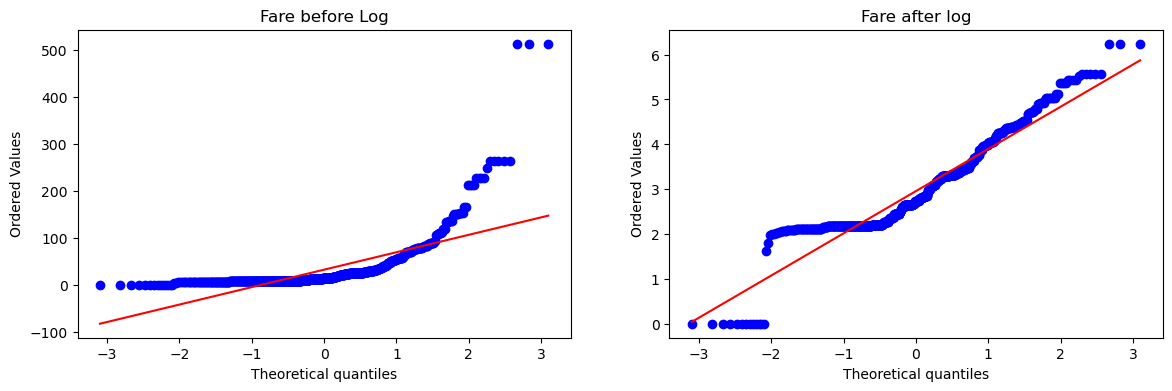

In [21]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare before Log")

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title("Fare after log")

Text(0.5, 1.0, 'Age after log')

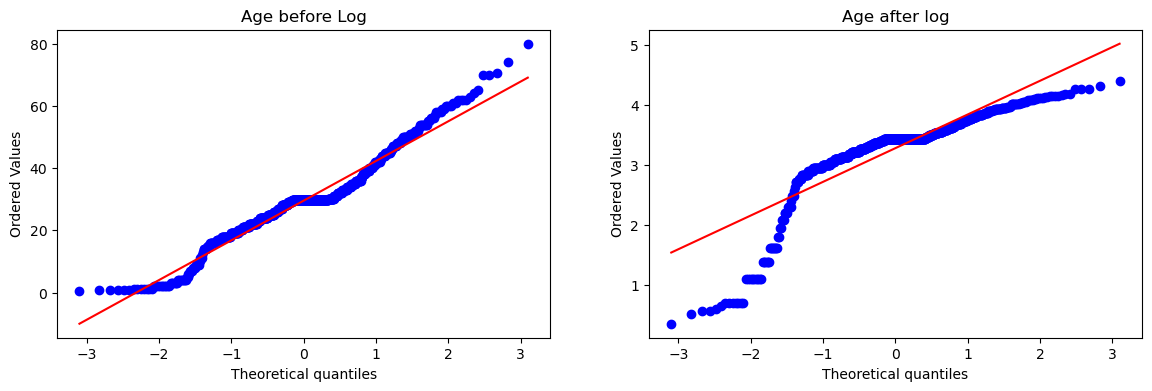

In [22]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age before Log")

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title("Age after log")

Defining a function to apply any transformation

In [27]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf, X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(X['Fare'],dist='norm',plot=plt)
    plt.title("Fare before Transform")
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist='norm',plot=plt)
    plt.title("Fare After Transform")
    
    plt.show()

Accuracy 0.6184144818976279


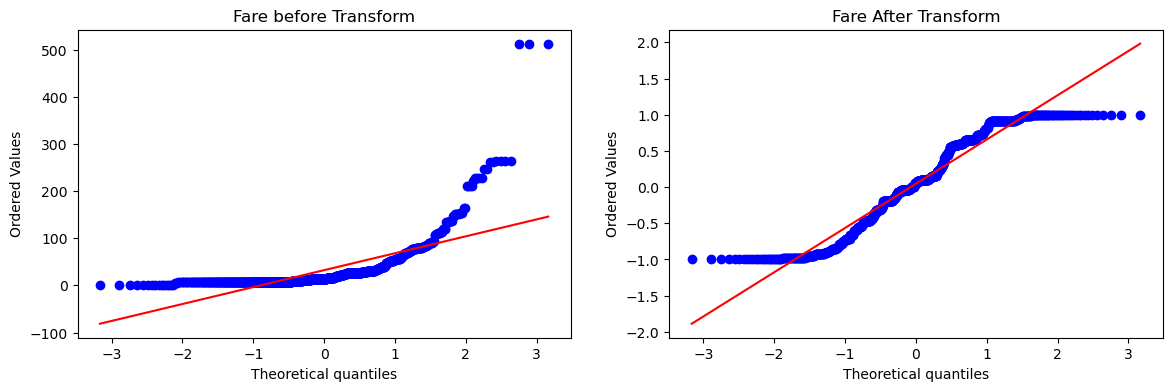

In [32]:
apply_transform(np.cos)